##Steps to be followed

1. We will collect the stock data
2. Preprocess the data - Train and Test
3. Create a Stacked LSTM Model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

In [1]:
!pip install pandas_datareader

In [2]:
#Data Collection
import pandas_datareader as pdr
key="bc798529cbdddd566aae0b363b8dab869862c063"

In [3]:
df = pdr.get_data_tiingo('GOOG', api_key=key)

In [4]:
df.to_csv('GOOGLE.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('GOOGLE.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2017-01-17 00:00:00+00:00,804.610,807.140,800.37,807.08,1362115,804.610,807.140,800.37,807.08,1362115,0.0,1.0
1,GOOG,2017-01-18 00:00:00+00:00,806.070,806.205,800.99,805.81,1294407,806.070,806.205,800.99,805.81,1294407,0.0,1.0
2,GOOG,2017-01-19 00:00:00+00:00,802.175,809.480,801.80,805.12,919325,802.175,809.480,801.80,805.12,919325,0.0,1.0
3,GOOG,2017-01-20 00:00:00+00:00,805.020,806.910,801.69,806.91,1670045,805.020,806.910,801.69,806.91,1670045,0.0,1.0
4,GOOG,2017-01-23 00:00:00+00:00,819.310,820.870,803.74,807.25,1963628,819.310,820.870,803.74,807.25,1963628,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2022-01-06 00:00:00+00:00,2751.02,2793.7200,2735.27,2749.95,1452452,2751.02,2793.7200,2735.27,2749.95,1452452,0.0,1.0
1254,GOOG,2022-01-07 00:00:00+00:00,2740.09,2765.0949,2715.78,2758.10,970412,2740.09,2765.0949,2715.78,2758.10,970412,0.0,1.0
1255,GOOG,2022-01-10 00:00:00+00:00,2771.48,2772.8000,2662.81,2701.98,1704784,2771.48,2772.8000,2662.81,2701.98,1704784,0.0,1.0
1256,GOOG,2022-01-11 00:00:00+00:00,2800.35,2806.5900,2736.27,2763.61,1148153,2800.35,2806.5900,2736.27,2763.61,1148153,0.0,1.0
1257,GOOG,2022-01-12 00:00:00+00:00,2832.96,2856.2849,2822.24,2831.09,1182079,2832.96,2856.2849,2822.24,2831.09,1182079,0.0,1.0


In [9]:
df.shape

(1258, 14)

In [10]:
df['close']

0        804.610
1        806.070
2        802.175
3        805.020
4        819.310
          ...   
1253    2751.020
1254    2740.090
1255    2771.480
1256    2800.350
1257    2832.960
Name: close, Length: 1258, dtype: float64

In [11]:
df1 = df.reset_index()['close']

In [12]:
df1

0        804.610
1        806.070
2        802.175
3        805.020
4        819.310
          ...   
1253    2751.020
1254    2740.090
1255    2771.480
1256    2800.350
1257    2832.960
Name: close, Length: 1258, dtype: float64

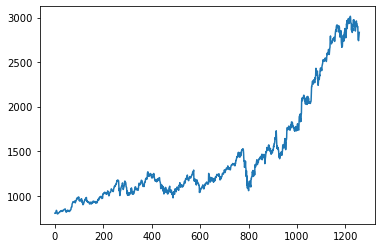

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

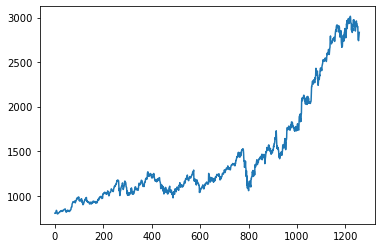

In [14]:
plt.plot(df['close'])

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [17]:
df2 = np.array(df['close']).reshape(-1,1)
print(df2.shape)
df2

(1258, 1)


array([[ 804.61 ],
       [ 806.07 ],
       [ 802.175],
       ...,
       [2771.48 ],
       [2800.35 ],
       [2832.96 ]])

In [18]:
np.array(df['close']).shape

(1258,)

In [19]:
df['close'].shape

(1258,)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_new = scaler.fit_transform(np.array(df['close']).reshape(-1,1))

In [21]:
df_new

array([[0.00401851],
       [0.00467661],
       [0.00292091],
       ...,
       [0.89060102],
       [0.9036144 ],
       [0.91831362]])

In [22]:
#splitting dataset into train and test split
training_size = int(len(df_new)*0.65)
test_size = len(df_new) - training_size
train_data, test_data = df_new[0:training_size,:],df_new[training_size:len(df_new),:1]

In [23]:
training_size,test_size

(817, 441)

In [24]:
train_data

array([[0.00401851],
       [0.00467661],
       [0.00292091],
       [0.00420332],
       [0.01064465],
       [0.01270011],
       [0.01801905],
       [0.01643239],
       [0.01244768],
       [0.00298627],
       [0.00049358],
       [0.        ],
       [0.0012779 ],
       [0.00261214],
       [0.00254453],
       [0.0050823 ],
       [0.00571787],
       [0.00624976],
       [0.00810238],
       [0.0106131 ],
       [0.01115852],
       [0.0104959 ],
       [0.01283083],
       [0.01459329],
       [0.01621151],
       [0.01580583],
       [0.01606276],
       [0.01485022],
       [0.01513871],
       [0.01240261],
       [0.01782523],
       [0.01574723],
       [0.01504856],
       [0.01446257],
       [0.0163242 ],
       [0.01788383],
       [0.01937584],
       [0.0214358 ],
       [0.02246804],
       [0.0225041 ],
       [0.02321629],
       [0.02392849],
       [0.02543402],
       [0.0237572 ],
       [0.0156706 ],
       [0.01527844],
       [0.00986484],
       [0.008

In [25]:
test_data

array([[0.21085335],
       [0.21976935],
       [0.21226873],
       [0.18960913],
       [0.21073616],
       [0.21664109],
       [0.21799336],
       [0.21644726],
       [0.19742076],
       [0.24601699],
       [0.24925343],
       [0.23660967],
       [0.23939986],
       [0.25035779],
       [0.2486404 ],
       [0.26002655],
       [0.26715303],
       [0.27386482],
       [0.26145996],
       [0.24955544],
       [0.25262059],
       [0.26031053],
       [0.26515618],
       [0.26044125],
       [0.27542445],
       [0.27365747],
       [0.27709225],
       [0.28006725],
       [0.28043687],
       [0.27993653],
       [0.28543127],
       [0.28673847],
       [0.29007408],
       [0.28879393],
       [0.27788558],
       [0.28969995],
       [0.29340518],
       [0.29770992],
       [0.30207777],
       [0.27412626],
       [0.27833634],
       [0.2813429 ],
       [0.29165174],
       [0.2954381 ],
       [0.28860461],
       [0.2866934 ],
       [0.29577166],
       [0.301

In [40]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
## Create the stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 377ms/step - loss: 3.2224e-04 - val_loss: 0.0995
Epoch 2/100
12/12 [==============================] - 4s 365ms/step - loss: 3.2427e-04 - val_loss: 0.1035
Epoch 3/100
12/12 [==============================] - 4s 372ms/step - loss: 3.1938e-04 - val_loss: 0.1074
Epoch 4/100
12/12 [==============================] - 4s 365ms/step - loss: 3.4439e-04 - val_loss: 0.1201
Epoch 5/100
12/12 [==============================] - 4s 364ms/step - loss: 3.3373e-04 - val_loss: 0.1023
Epoch 6/100
12/12 [==============================] - 4s 360ms/step - loss: 3.2201e-04 - val_loss: 0.1097
Epoch 7/100
12/12 [==============================] - 5s 408ms/step - loss: 3.1473e-04 - val_loss: 0.1507
Epoch 8/100
12/12 [==============================] - 5s 405ms/step - loss: 2.8985e-04 - val_loss: 0.1584
Epoch 9/100
12/12 [==============================] - 5s 386ms/step - loss: 3.4751e-04 - val_loss: 0.1391
Epoch 10/100
12/12 [==============================] - 5

12/12 [==============================] - 4s 373ms/step - loss: 1.6578e-04 - val_loss: 0.0275
Epoch 79/100
12/12 [==============================] - 5s 385ms/step - loss: 1.6042e-04 - val_loss: 0.0125
Epoch 80/100
12/12 [==============================] - 5s 410ms/step - loss: 1.5243e-04 - val_loss: 0.0214
Epoch 81/100
12/12 [==============================] - 5s 379ms/step - loss: 1.5339e-04 - val_loss: 0.0080
Epoch 82/100
12/12 [==============================] - 5s 428ms/step - loss: 1.5488e-04 - val_loss: 0.0122
Epoch 83/100
12/12 [==============================] - 5s 411ms/step - loss: 1.4810e-04 - val_loss: 0.0100
Epoch 84/100
12/12 [==============================] - 5s 393ms/step - loss: 1.4653e-04 - val_loss: 0.0079
Epoch 85/100
12/12 [==============================] - 5s 391ms/step - loss: 1.5413e-04 - val_loss: 0.0038
Epoch 86/100
12/12 [==============================] - 5s 432ms/step - loss: 1.4785e-04 - val_loss: 0.0155
Epoch 87/100
12/12 [==============================] - 5s 40

In [50]:
import tensorflow as tf

In [51]:
tf.__version__

'2.4.1'

In [52]:
## Lets do the prediction and check performance metrices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [53]:
## transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [54]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1140.4746287566825

In [55]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

2076.546754988893

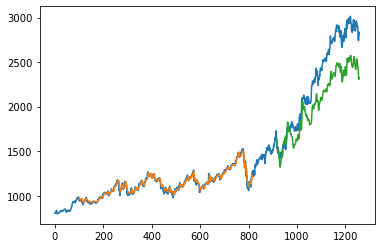

In [58]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_new)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_new)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_new))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [59]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
temp_input

[0.913368807992842,
 0.9250795024532509,
 0.9300513638812072,
 0.9225958255295844,
 0.9444801294577158,
 0.9527650626441019,
 0.9526974489347461,
 0.9561232102087688,
 0.9414916035041933,
 0.9465040331577631,
 0.9532113131258496,
 0.9474821781531092,
 0.947752632990532,
 0.9207747629576041,
 0.9346941719236327,
 0.9341622774100343,
 0.9503895676554045,
 0.9428844459169209,
 0.9166503266869058,
 0.8945947346950737,
 0.9002697787003294,
 0.9119173670320061,
 0.9199228302197223,
 0.9271935577657727,
 0.9169883952336843,
 0.8690547828811103,
 0.8540625697266379,
 0.8427440347804921,
 0.8715655052885191,
 0.8472471078235825,
 0.8689916767523783,
 0.879602521540601,
 0.8961137893652652,
 0.9039614872311511,
 0.8930666648636344,
 0.8738238031809998,
 0.8845247995816966,
 0.9161860458826633,
 0.9185570332907368,
 0.9301460230743054,
 0.9379125844889645,
 0.9252282526138335,
 0.9285232940497684,
 0.8910607914860819,
 0.8923950353507012,
 0.9004996653121388,
 0.9614015871191378,
 0.9587105614867

In [63]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [ 0.86899168  0.87960252  0.89611379  0.90396149  0.89306666  0.8738238
  0.8845248   0.91618605  0.91855703  0.93014602  0.93791258  0.92522825
  0.92852329  0.89106079  0.89239504  0.90049967  0.96140159  0.95871056
  0.97801653  0.93747986  0.95631253  0.96466958  0.98173528  0.98676574
  0.98776192  0.98683336  0.9631911   0.96429095  0.99041238  0.98809097
  0.98527824  0.98515203  1.          0.99318003  0.96727046  0.96437208
  0.96401598  0.92875318  0.95857533  0.92556181  0.91804317  0.93750239
  0.92617935  0.9376827   0.97590698  0.98207335  0.97653354  0.98166316
  0.96389879  0.9482665   0.96988485  0.9470765   0.92872614  0.92510655
  0.94150513  0.96610299  0.96784743  0.9761549   0.9615864   0.96209575
  0.95757014  0.94564309  0.94920407  0.9432721   0.88230256  0.88137851
  0.87645172  0.89060102  0.9036144   0.91831362  0.72587025  0.65671748
  0.55089557  0.43799168  0.33233482  0.24395636  0.17925958  0.13889243
  0.1181967   0.10934786  0.1030708   0.

7 day output [[-0.10165131]]
8 day input [ 0.91855703  0.93014602  0.93791258  0.92522825  0.92852329  0.89106079
  0.89239504  0.90049967  0.96140159  0.95871056  0.97801653  0.93747986
  0.95631253  0.96466958  0.98173528  0.98676574  0.98776192  0.98683336
  0.9631911   0.96429095  0.99041238  0.98809097  0.98527824  0.98515203
  1.          0.99318003  0.96727046  0.96437208  0.96401598  0.92875318
  0.95857533  0.92556181  0.91804317  0.93750239  0.92617935  0.9376827
  0.97590698  0.98207335  0.97653354  0.98166316  0.96389879  0.9482665
  0.96988485  0.9470765   0.92872614  0.92510655  0.94150513  0.96610299
  0.96784743  0.9761549   0.9615864   0.96209575  0.95757014  0.94564309
  0.94920407  0.9432721   0.88230256  0.88137851  0.87645172  0.89060102
  0.9036144   0.91831362  0.72587025  0.65671748  0.55089557  0.43799168
  0.33233482  0.24395636  0.17925958  0.13889243  0.1181967   0.10934786
  0.1030708   0.09090651  0.06761201  0.03216792 -0.01294054 -0.06381235
 -0.11587927

15 day output [[-0.05529173]]
16 day input [ 0.96140159  0.95871056  0.97801653  0.93747986  0.95631253  0.96466958
  0.98173528  0.98676574  0.98776192  0.98683336  0.9631911   0.96429095
  0.99041238  0.98809097  0.98527824  0.98515203  1.          0.99318003
  0.96727046  0.96437208  0.96401598  0.92875318  0.95857533  0.92556181
  0.91804317  0.93750239  0.92617935  0.9376827   0.97590698  0.98207335
  0.97653354  0.98166316  0.96389879  0.9482665   0.96988485  0.9470765
  0.92872614  0.92510655  0.94150513  0.96610299  0.96784743  0.9761549
  0.9615864   0.96209575  0.95757014  0.94564309  0.94920407  0.9432721
  0.88230256  0.88137851  0.87645172  0.89060102  0.9036144   0.91831362
  0.72587025  0.65671748  0.55089557  0.43799168  0.33233482  0.24395636
  0.17925958  0.13889243  0.1181967   0.10934786  0.1030708   0.09090651
  0.06761201  0.03216792 -0.01294054 -0.06381235 -0.11587927 -0.16496688
 -0.20759922 -0.24153548 -0.26590252 -0.28100348 -0.28792781 -0.28820354
 -0.2834967

23 day output [[-0.031097]]
24 day input [ 0.98776192  0.98683336  0.9631911   0.96429095  0.99041238  0.98809097
  0.98527824  0.98515203  1.          0.99318003  0.96727046  0.96437208
  0.96401598  0.92875318  0.95857533  0.92556181  0.91804317  0.93750239
  0.92617935  0.9376827   0.97590698  0.98207335  0.97653354  0.98166316
  0.96389879  0.9482665   0.96988485  0.9470765   0.92872614  0.92510655
  0.94150513  0.96610299  0.96784743  0.9761549   0.9615864   0.96209575
  0.95757014  0.94564309  0.94920407  0.9432721   0.88230256  0.88137851
  0.87645172  0.89060102  0.9036144   0.91831362  0.72587025  0.65671748
  0.55089557  0.43799168  0.33233482  0.24395636  0.17925958  0.13889243
  0.1181967   0.10934786  0.1030708   0.09090651  0.06761201  0.03216792
 -0.01294054 -0.06381235 -0.11587927 -0.16496688 -0.20759922 -0.24153548
 -0.26590252 -0.28100348 -0.28792781 -0.28820354 -0.28349677 -0.27531141
 -0.26471692 -0.25225294 -0.23807299 -0.22230271 -0.20528817 -0.1876522
 -0.1701375

In [64]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [65]:
import matplotlib.pyplot as plt

In [66]:
len(df_new)

1258

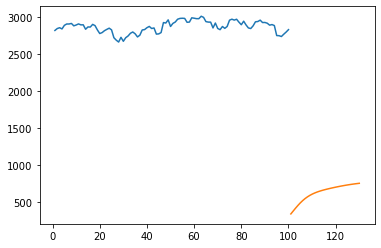

In [68]:
plt.plot(day_new,scaler.inverse_transform(df_new[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

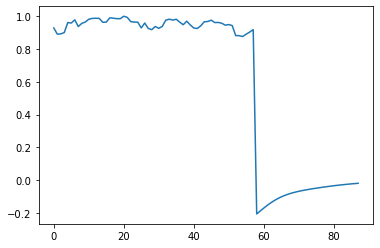

In [69]:
df3=df_new.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

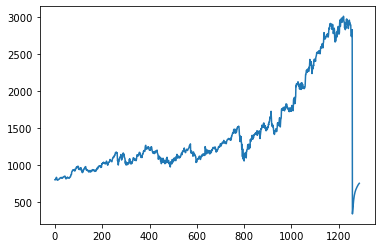

In [70]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)